In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import math as math
from numpy import *
import numpy.linalg as nlg
from factor_analyzer import factor_analyzer,Rotator
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity  

In [3]:
df_sum=pd.read_excel('dataall_clean.xlsx')

In [4]:
from scipy.stats import kstest

In [5]:
factor_data=df_sum.iloc[:,6:].dropna()

In [6]:
factor_data

,density,highedu,birth,House_Price,tertiary_gdp,raising_rate,sex_ratio,consume_increase,illteracy_rate,family_avg_num
0,7.034852,0.526800,0.824,10.529966,10.222234,1.337,0.9875,1.005679,1.693737,2.477914
1,8.520449,0.415000,0.667,9.675599,9.030295,1.303,1.1572,0.998424,1.385017,2.490174
2,8.248711,0.351700,0.720,10.274399,10.148246,1.308,1.0661,0.999118,2.376967,2.379654
3,7.614028,0.308100,1.102,9.010666,9.338548,2.468,1.0035,1.010281,3.827026,2.869315
4,8.074137,0.245700,1.126,8.931515,9.695969,2.685,1.0167,1.007075,3.951175,3.103387
...,...,...,...,...,...,...,...,...,...,...
336,8.610319,0.287991,1.029,7.944847,7.900911,2.224,1.0279,1.011028,8.188123,3.168425
337,8.243283,0.168684,1.322,7.523481,7.118186,2.899,1.0239,1.028508,17.776008,3.596755
338,7.626083,0.103324,1.449,7.776535,5.874734,3.044,1.0161,1.032009,16.687931,3.635897
339,6.783325,0.161025,1.431,7.703008,6.163315,3.239,1.0371,1.028336,10.077338,3.563589


In [7]:
kmo = calculate_kmo(factor_data) 

C:\Users\CAI\anaconda3\lib\site-packages\factor_analyzer\utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [8]:
kmo[1]

0.7557093717652107

In [9]:
kmo

(array([0.34497424, 0.81492355, 0.76500508, 0.63271561, 0.80821714,
        0.79747257, 0.32655269, 0.61673703, 0.72284202, 0.84314107]),
 0.7557093717652107)

In [10]:
bartlett = calculate_bartlett_sphericity(factor_data)

In [11]:
bartlett

(1730.8159343801872, 0.0)

In [12]:
fa = FactorAnalyzer(11, rotation=None)
fa.fit(factor_data)

#特征根和特征向量
ev, v = fa.get_eigenvalues()

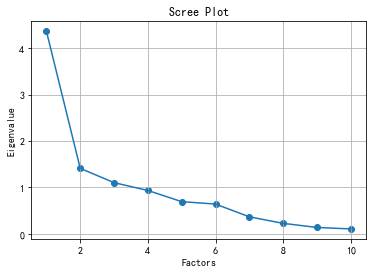

In [13]:
plt.scatter(range(1,factor_data.shape[1]+1),ev)
plt.plot(range(1,factor_data.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.savefig('Scree Plot.png',dpi=300)
plt.show()

In [14]:
fa = FactorAnalyzer(2, rotation="varimax")
fa.fit(factor_data)
fa.loadings_

array([[ 0.02002048,  0.20701642],
       [-0.74555572,  0.04678519],
       [ 0.801834  ,  0.28037997],
       [-0.59369554,  0.33716378],
       [-0.64287095,  0.43500129],
       [ 0.93628806,  0.25109209],
       [ 0.05440533,  0.4666221 ],
       [-0.06148889,  0.12306765],
       [ 0.60585236, -0.35701365],
       [ 0.90081713, -0.09423187]])

In [15]:
fa.get_factor_variance()

(array([4.0268541 , 0.85883058]),
 array([0.40268541, 0.08588306]),
 array([0.40268541, 0.48856847]))

In [16]:
fa.get_communalities()

array([0.04325662, 0.55804218, 0.72155069, 0.46615381, 0.60250919,
       0.93968256, 0.22069612, 0.01892653, 0.49451583, 0.82035115])

In [17]:
factor_data.columns

Index(['density', 'highedu', 'birth', 'House_Price', 'tertiary_gdp',
       'raising_rate', 'sex_ratio', 'consume_increase', 'illteracy_rate',
       'family_avg_num'],
      dtype='object')

In [18]:
fa_l=pd.DataFrame(fa.loadings_)

In [19]:
fa_l.columns=['Factor 1','Factor 2']

In [20]:
fa_l.index=factor_data.columns

In [21]:
fa_l['communality']=fa.get_communalities()

In [22]:
fa_l

,Factor 1,Factor 2,communality
density,0.020020,0.207016,0.043257
highedu,-0.745556,0.046785,0.558042
birth,0.801834,0.280380,0.721551
House_Price,-0.593696,0.337164,0.466154
tertiary_gdp,-0.642871,0.435001,0.602509
raising_rate,0.936288,0.251092,0.939683
sex_ratio,0.054405,0.466622,0.220696
consume_increase,-0.061489,0.123068,0.018927
illteracy_rate,0.605852,-0.357014,0.494516
family_avg_num,0.900817,-0.094232,0.820351


In [23]:
fa_l.to_excel('factor1.xlsx')

In [24]:
factor2_data=factor_data.drop(['density','sex_ratio','consume_increase'],axis=1)

In [25]:
factor2_data

,highedu,birth,House_Price,tertiary_gdp,raising_rate,illteracy_rate,family_avg_num
0,0.526800,0.824,10.529966,10.222234,1.337,1.693737,2.477914
1,0.415000,0.667,9.675599,9.030295,1.303,1.385017,2.490174
2,0.351700,0.720,10.274399,10.148246,1.308,2.376967,2.379654
3,0.308100,1.102,9.010666,9.338548,2.468,3.827026,2.869315
4,0.245700,1.126,8.931515,9.695969,2.685,3.951175,3.103387
...,...,...,...,...,...,...,...
336,0.287991,1.029,7.944847,7.900911,2.224,8.188123,3.168425
337,0.168684,1.322,7.523481,7.118186,2.899,17.776008,3.596755
338,0.103324,1.449,7.776535,5.874734,3.044,16.687931,3.635897
339,0.161025,1.431,7.703008,6.163315,3.239,10.077338,3.563589


In [26]:
kmo = calculate_kmo(factor2_data)
kmo

(array([0.84555798, 0.76505436, 0.69230627, 0.82732363, 0.79350274,
        0.80720166, 0.86709884]),
 0.802375125641147)

In [27]:
bartlett = calculate_bartlett_sphericity(factor2_data)
bartlett

(1588.5165856442065, 0.0)

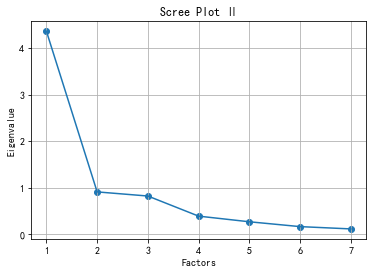

In [28]:
fa = FactorAnalyzer(7, rotation=None)
fa.fit(factor2_data)

#特征根和特征向量
ev, v = fa.get_eigenvalues()

plt.scatter(range(1,factor2_data.shape[1]+1),ev)
plt.plot(range(1,factor2_data.shape[1]+1),ev)
plt.title('Scree Plot Ⅱ')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.savefig('Scree Plot2.png',dpi=300)
plt.show()

In [29]:
fa = FactorAnalyzer(2, rotation="varimax")
fa.fit(factor2_data)
fa.loadings_

array([[-0.53253942,  0.51941217],
       [ 0.85197898, -0.23154864],
       [-0.26898804,  0.62087722],
       [-0.18825958,  0.82134861],
       [ 0.90217608, -0.36385269],
       [ 0.33320693, -0.56416366],
       [ 0.63725727, -0.64125769]])

In [30]:
fa.get_communalities()

array([0.55338723, 0.77948296, 0.45784308, 0.7100552 , 0.94631046,
       0.4293075 , 0.81730825])

In [31]:
fa.get_factor_variance()

(array([2.44830803, 2.24538666]),
 array([0.34975829, 0.32076952]),
 array([0.34975829, 0.67052781]))

In [32]:
fa_l=pd.DataFrame(fa.loadings_)
fa_l.columns=['Factor 1','Factor 2']
fa_l.index=factor2_data.columns
fa_l['Communality']=fa.get_communalities()
fa_l

,Factor 1,Factor 2,Communality
highedu,-0.532539,0.519412,0.553387
birth,0.851979,-0.231549,0.779483
House_Price,-0.268988,0.620877,0.457843
tertiary_gdp,-0.188260,0.821349,0.710055
raising_rate,0.902176,-0.363853,0.946310
illteracy_rate,0.333207,-0.564164,0.429307
family_avg_num,0.637257,-0.641258,0.817308


In [33]:
fa_l.to_excel('factor2.xlsx')

In [34]:
ev

array([4.36151411, 0.90573962, 0.81689758, 0.38446814, 0.26297314,
       0.15896188, 0.10944554])

In [35]:
v

array([ 4.20472518e+00,  7.62941860e-01,  5.93534504e-01,  1.62743594e-01,
        8.08527231e-02,  1.73946425e-02, -2.61801085e-07])